# **Exploring the contraceptive method choice database**
I wanted to try my hand at some data exploration and using machine learning. I used a [dataset](https://archive.ics.uci.edu/ml/datasets/Contraceptive+Method+Choice) from UCI machine learning library that contains the responses to the 1987 National Indonesia Contraceptive Prevalence Survey. It contains information on married, currently not pregnant women and their choice of contraception. 

In [0]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
# Importing the data file
data=pd.read_csv('cmc.data.txt',sep=',',header=None)

In [0]:
data.columns=['wife_age','wife_education','husband_education',
              'num_kids','wife_religion','wife_work','husband_work',
              'standard_living','media_exposure','contraceptive']

The columns in the data file represent the following parameters:
1. Wife's age (numerical)
2. Wife's education (categorical) 1=low, 2, 3, 4=high
3. Husband's education (categorical) 1=low, 2, 3, 4=high
4. Number of children ever born (numerical)
5. Wife's religion (binary) 0=Non-Islam, 1=Islam
6. Wife's now working? (binary) 0=Yes, 1=No
7. Husband's occupation (categorical) 1, 2, 3, 4
8. Standard-of-living index (categorical) 1=low, 2, 3, 4=high
9. Media exposure (binary) 0=Good, 1=Not good
10. Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-term

# Exploratory Data Analysis
I think in this case the exploration of the data can be more interesting than any predictions. The choice of contraceptive is a very personal choice that, in my opinion, depends on more than the factors included here, hence I would not expect a machine learning model to be very accurate at predictions. 

However, it will be very interesting to explore the data and see possible associations.

In [52]:
data.head()

,wife_age,wife_education,husband_education,num_kids,wife_religion,wife_work,husband_work,standard_living,media_exposure,contraceptive
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
wife_age             1473 non-null int64
wife_education       1473 non-null int64
husband_education    1473 non-null int64
num_kids             1473 non-null int64
wife_religion        1473 non-null int64
wife_work            1473 non-null int64
husband_work         1473 non-null int64
standard_living      1473 non-null int64
media_exposure       1473 non-null int64
contraceptive        1473 non-null int64
dtypes: int64(10)
memory usage: 115.2 KB


Histogram of the number of kids the women have. Not surprisingly, the peak of the distribution is around 1-3 kids and drops of after. 

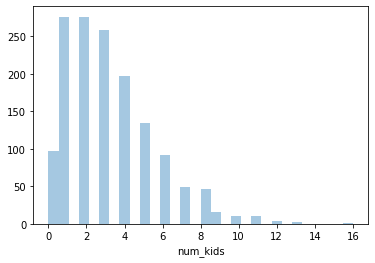

In [54]:
sns.distplot(data['num_kids'],kde=False,bins=30)

Histogram of the women's ages

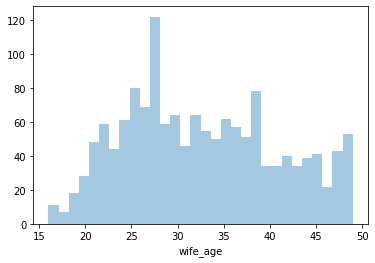

In [55]:
sns.distplot(data['wife_age'],kde=False, bins=30)

Scatter plot of number of kids as a function of the woman's age. The maximum number of children is increasing with age, which makes sense, since older women had more time to have kids. It is also possible that an older generation had a tendency to have more children.

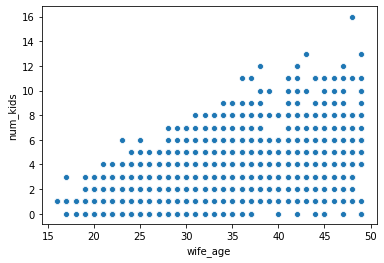

In [56]:
sns.scatterplot(data=data,x='wife_age',y='num_kids')

Interestingly, here we can see that the mean number of kids does not change much with education of the woman. It is 4 for those with lowest education and 3 for all the others. 

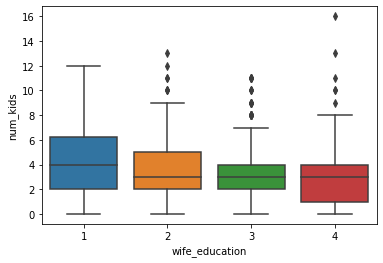

In [57]:
sns.boxplot(data=data,x='wife_education',y='num_kids')

I wanted to see how common each of the types of contraceptive was. None is the most common, followed by short and finally long term ones. It is clear that most married Indonesian women at the time were not using contraceptives. 

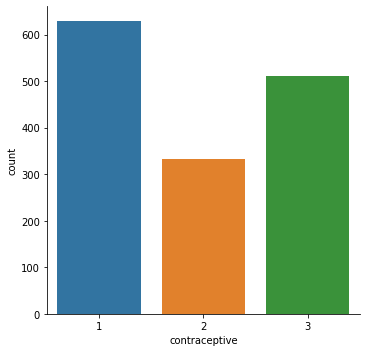

In [58]:
sns.catplot(data=data,x='contraceptive',kind='count')

Then I wanted to see whether the number of kids affected the contraceptive use. From the boxplot, the women not using any had the lowest mean number of children, while those who used the long term contraception seem to have on average more children than the other two groups. The following histogram shows an interesting fact that those with no kids were almost all not using contraception. It is clear that Indonesian married couples at the time wanted to have at least one child. 

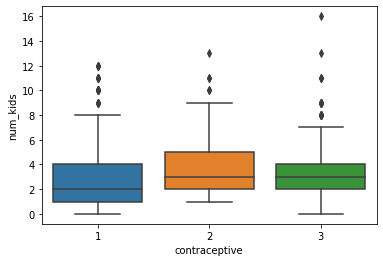

In [59]:
sns.boxplot(data=data, x='contraceptive',y='num_kids')

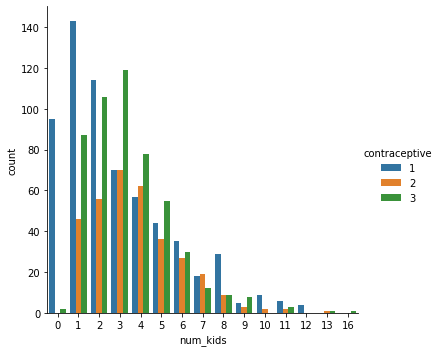

In [60]:
sns.catplot(data=data,x='num_kids',hue='contraceptive',kind='count')

There is a very large spread for the women not using any contraceptive, from the youngest to the oldest ones. For the long term, it seems like it is preferred by those a bit older and the short term contraceptive is favoured by the younger women

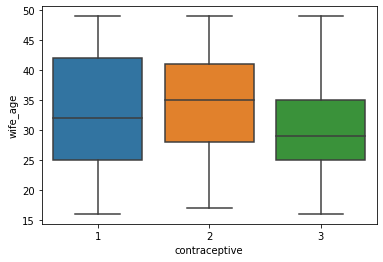

In [61]:
sns.boxplot(data=data, x='contraceptive',y='wife_age')

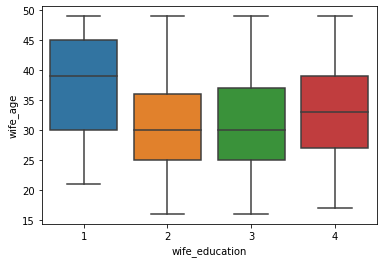

In [62]:
sns.boxplot(data=data,x='wife_education',y='wife_age')

Since many of the groups have very different numbers of people in them. As in there are many more who are exposed to media than not, more that are muslims than those not, etc, I wanted to normalize some data and display it as a percentage rather than raw count, to see the distribution of the contraceptive method within each group. We also don't know how representative this sample was of the population, so there is no point making conclusions based on the ratio between the groups. 

In [0]:
def get_percentage(dat,str1,str2):
  '''
  Function that takes a dataframe dat and two strings representing columns in 
  the dataframe, the first string is the category we want to explore, the second
  is the subdivision within the first category. 
  The function returns a dataframe with the main category as rows and subcategory
  as columns
  '''
  # number of possible responses within each category
  n1=dat[str1].nunique()
  n2=dat[str2].nunique()
  # percentage array for the calculated percentages
  perc=np.zeros([n1,n2])
  # looping through the main category and then the subcategory to calculate 
  # the percentage of the number of responses in each
  for i in range(n1):
    datstr1=dat[dat[str1]==np.sort(dat[str1].unique())[i]]
    total=datstr1.size
    for j in range(n2):
      perc[i,j]=datstr1[datstr1[str2]==np.sort(dat[str2].unique())[j]].size/total*100.0
  return pd.DataFrame(data=perc, index=np.sort(dat[str1].unique()), columns=np.sort(dat[str2].unique()))

From the following plots, it can be seen that the wife's education and to a smaller extent standard of living seem to be related to the contraceptive use, apart from the factors we already saw (age and number of kids). The religion and work seem to matter very little. Good media exposure also seems to encourage contraceptive use

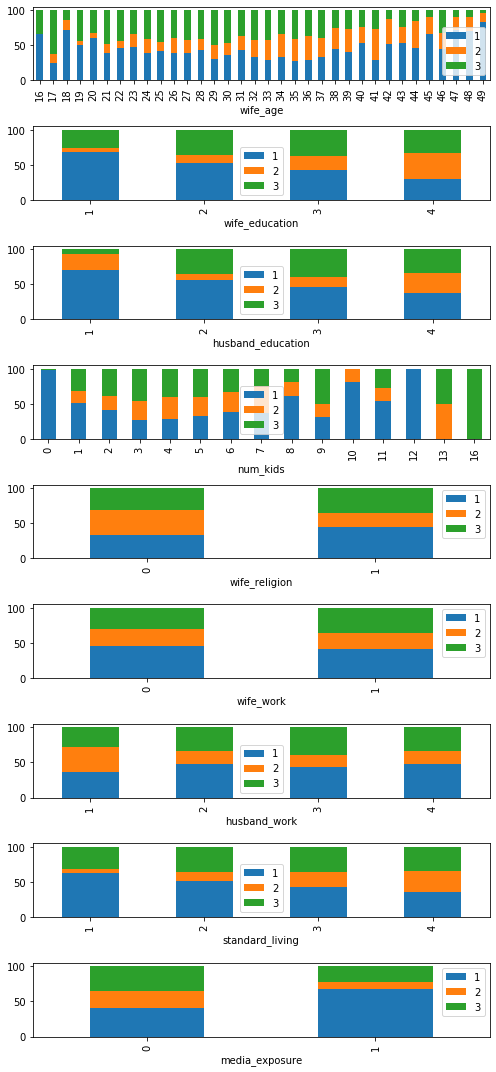

In [73]:
cols2plot=['wife_age','wife_education', 'husband_education','num_kids',
       'wife_religion', 'wife_work', 'husband_work', 'standard_living',
       'media_exposure']
fig, ax = plt.subplots(nrows=9,ncols=1,figsize=(7,15))
for i in range(9):
  get_percentage(data,cols2plot[i],'contraceptive').plot.bar(ax=ax[i],stacked=True)
  ax[i].set_xlabel(cols2plot[i])
fig.tight_layout()

In [0]:
#sns.catplot(data=data,hue='contraceptive',x='wife_education',kind='count')
#sns.catplot(data=data,hue='contraceptive',x='husband_education',kind='count')
#sns.catplot(data=data,hue='contraceptive',x='wife_religion',kind='count')
#sns.catplot(data=data,hue='contraceptive',x='wife_work',kind='count')
#sns.catplot(data=data,hue='contraceptive',x='husband_work',kind='count')
#sns.catplot(data=data,hue='contraceptive',x='standard_living',kind='count')
#sns.catplot(data=data,hue='contraceptive',x='media_exposure',kind='count')

I was a bit curious about the relationship between the husband's and wife's education level. Funnily enough, the husband is most likely to have education one level above his wife, if possible. These two factors are highly correlated.

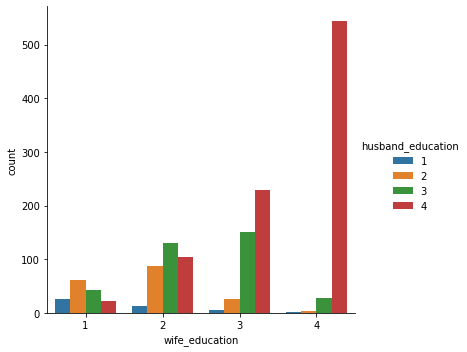

In [0]:
sns.catplot(data=data,x='wife_education',hue='husband_education',kind='count')

Text(0.5, 0, 'wife_education')

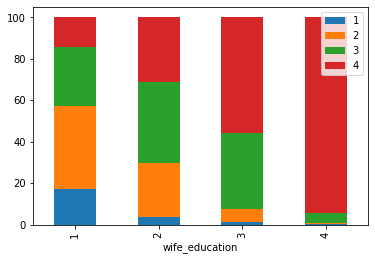

In [30]:
f,ax1 = plt.subplots()
get_percentage(data,'wife_education','husband_education').plot.bar(ax=ax1,stacked=True)
ax1.set_xlabel('wife_education')

# Principal component analysis

Next I tried principal component analysis of the parameters, trying to see if we can identify groups of people and maybe see what makes them different. Find out which features are the most important ones.

In [0]:
y=data['contraceptive']

In [89]:
data.columns

Index(['wife_age', 'wife_education', 'husband_education', 'num_kids',
       'wife_religion', 'wife_work', 'husband_work', 'standard_living',
       'media_exposure', 'contraceptive'],
      dtype='object')

In [0]:
X=data[['wife_age', 'wife_education', 'husband_education', 'num_kids',
       'wife_religion', 'wife_work', 'husband_work', 'standard_living',
       'media_exposure']]

### Scaling the data first

In [0]:
from sklearn.preprocessing import StandardScaler

In [91]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
scaled_data = scaler.transform(X)

### PCA

In [0]:
from sklearn.decomposition import PCA

In [0]:
pca = PCA(n_components=2)

In [123]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
x_pca = pca.transform(scaled_data)

In [125]:
scaled_data.shape

(1473, 9)

In [126]:
x_pca.shape

(1473, 2)

### Plotting the data in the two main component 
with color of the points showing the type of contraceptive, blue is none, red is long term, yellow short term. We can see that no clear groups are forming, the data is largely overalapping. The no contraception seems to have the largest spread.

Text(0, 0.5, 'Second Principal Component')

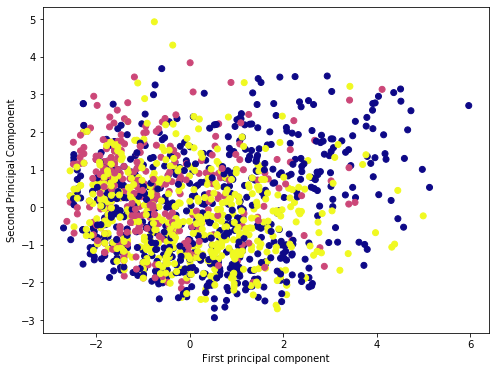

In [127]:
#from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,6))
#ax = fig.add_subplot(111, projection='3d')
ax=fig.add_subplot()
ax.scatter(x_pca[:,0],x_pca[:,1],c=y,cmap='plasma')
ax.set_xlabel('First principal component')
ax.set_ylabel('Second Principal Component')

### Visualizing the components
Next I visualized the contribution of each parameter to the first two components. The first components seems to depend mostly on wife and husband education and standard of living. This should explain the largest variations in the dataset. The second component is strongly related to the wife's age and number of kids. 

We previously saw all of these factors as important during the EDA. 

In [0]:
df_comp = pd.DataFrame(pca.components_,columns=X.columns)

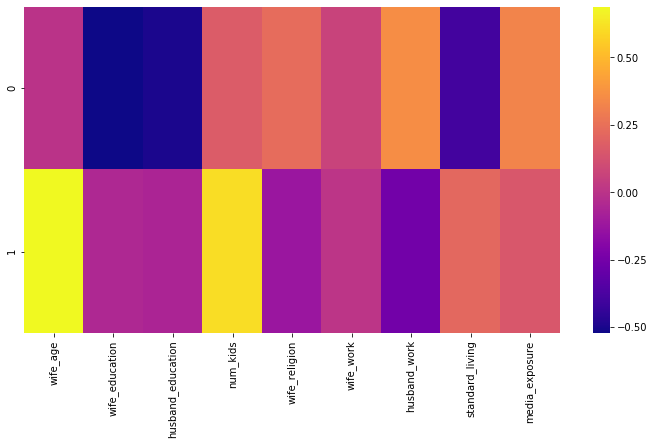

In [129]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma')

# Predicting contraceptive method

### Splitting the data into training and testing set

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

### Support vector machines

In [0]:
from sklearn import svm

In [66]:
svmod=svm.SVC()
svmod.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
predictions=svmod.predict(X_test)

In [0]:
from sklearn.metrics import classification_report

In [69]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.64      0.60      0.62       194
           2       0.00      0.00      0.00       101
           3       0.43      0.77      0.55       147

    accuracy                           0.52       442
   macro avg       0.36      0.46      0.39       442
weighted avg       0.43      0.52      0.46       442



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
print(confusion_matrix(y_test,predictions))

[[116   0  78]
 [ 31   0  70]
 [ 34   0 113]]


The model didn't assign anyone to the second group. To adjust the parameters, I performed a grid search.

In [0]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
grid = GridSearchCV(svm.SVC(),param_grid,refit=True,verbose=1)

In [0]:
grid.fit(X_train,y_train)

In [75]:
grid.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [76]:
grid.best_estimator_

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
grid_predictions = grid.predict(X_test)

In [78]:
print(confusion_matrix(y_test,grid_predictions))

[[116  13  65]
 [ 21  25  55]
 [ 25   8 114]]


In [79]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           1       0.72      0.60      0.65       194
           2       0.54      0.25      0.34       101
           3       0.49      0.78      0.60       147

    accuracy                           0.58       442
   macro avg       0.58      0.54      0.53       442
weighted avg       0.60      0.58      0.56       442



The predictions here are better than chance but not tremendously accurate, as I expected.

### Decision tree

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
dtree = DecisionTreeClassifier()

In [81]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
predictions = dtree.predict(X_test)

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [84]:
print(confusion_matrix(y_test,predictions))

[[122  29  43]
 [ 26  37  38]
 [ 51  34  62]]


In [85]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.61      0.63      0.62       194
           2       0.37      0.37      0.37       101
           3       0.43      0.42      0.43       147

    accuracy                           0.50       442
   macro avg       0.47      0.47      0.47       442
weighted avg       0.50      0.50      0.50       442



The SVM has higher precision than the decision tree, but the decision tree seems to be a little better at predicting the first and second contraception class, but much worse on the third. 